<a href="https://colab.research.google.com/github/GreenOrange44/AIR/blob/main/HandsOn/GraphsStats/AirPassengersj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moving Average**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


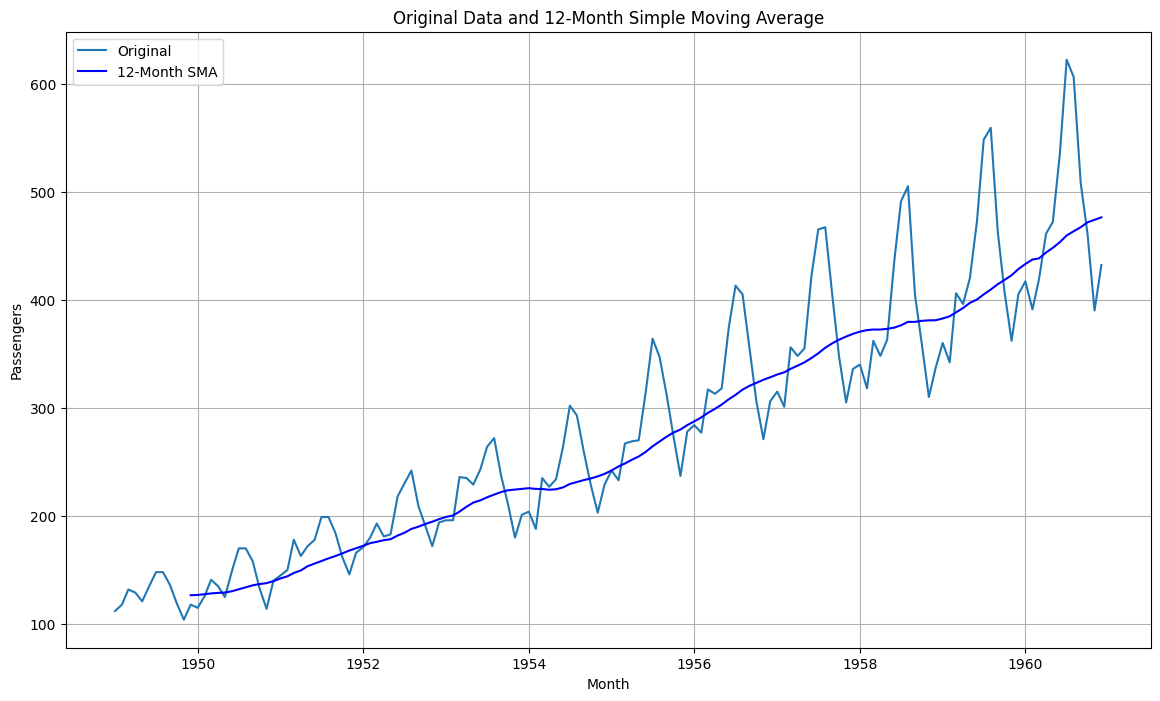

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df.info()

def moving_average(series, window):
    n = len(series)
    MA = [np.nan] * n  # Initialize the list with NaNs


    for i in range(n - window + 1):
        MA[i + window - 1] = np.mean(series[i:i + window])


    return MA


# Calculate the simple moving average (not centered) with a window of 12
df['SMA'] = moving_average(df['Passengers'], 12)


# Plot the original data and the simple moving average
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, df['SMA'], label='12-Month SMA', color='blue')
plt.title('Original Data and 12-Month Simple Moving Average')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()




# **Centered Moving Average**

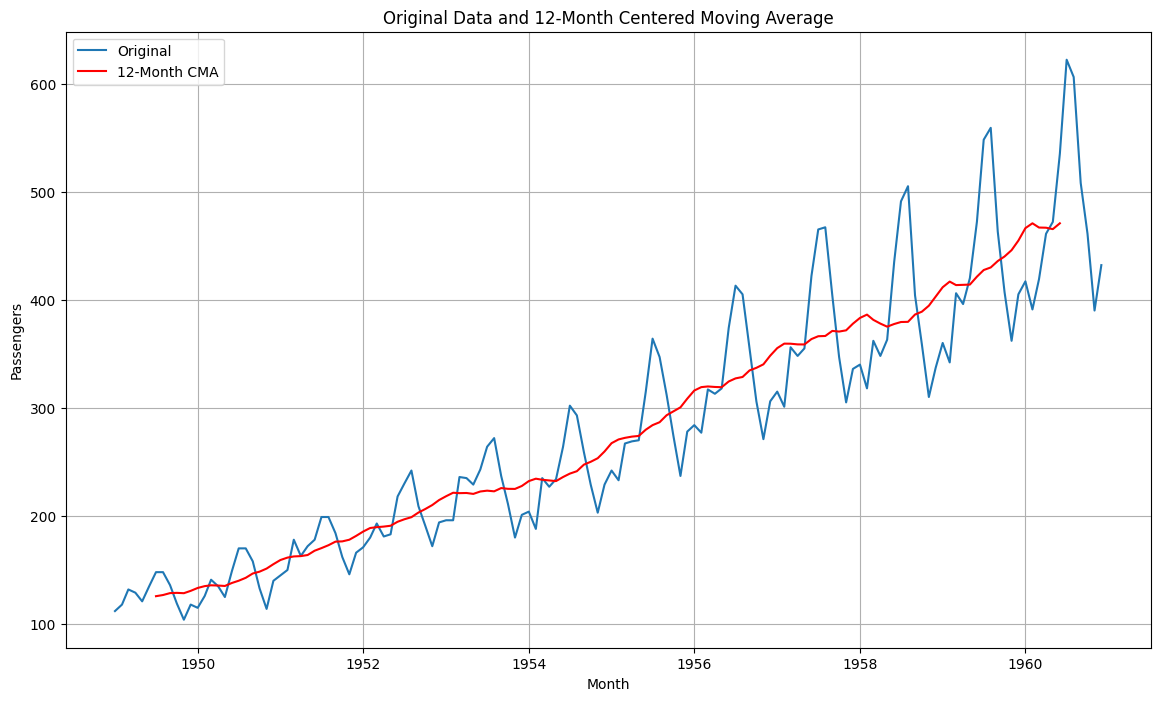

In [ ]:
# Calculate the 12-month centered moving average manually
def centered_moving_average(series, window):
    n = len(series)
    CMA = [np.nan] * n  # Initialize the list with NaNs

    half_window = window // 2

    for i in range(half_window, n - half_window):
        CMA[i] = np.mean(series[i - half_window:i + half_window + 1])

    return CMA

# Calculate the CMA
df['CMA'] = centered_moving_average(df['Passengers'], 12)



# Plot the original data and the CMA
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, df['CMA'], label='12-Month CMA', color='red')
plt.title('Original Data and 12-Month Centered Moving Average')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate a simple moving average forecast
def moving_average_forecast(series, window):
    n = len(series)
    forecast = [np.nan] * n  # Initialize the list with NaNs

    for i in range(window, n):
        forecast[i] = np.mean(series[i - window:i])

    return forecast

In [ ]:
# Define window size (forecasts for the first window_size points are set to NaN) & (order of moving average)
window_size = 12

In [ ]:
# Compute forecast using moving average
df['forecast'] = moving_average_forecast(df['Passengers'], window_size)

# Compute forecast error
df['forecast_error'] = df['Passengers'] - df['forecast']

# Compute absolute error
df['absolute_error'] = np.abs(df['forecast_error'])

# Compute squared error
df['squared_error'] = df['forecast_error'] ** 2

# Calculate Mean Absolute Error (MAE)
mae = np.mean(df['absolute_error'][window_size:])  # Exclude NaN values

# Calculate Mean Squared Error (MSE)
mse = np.mean(df['squared_error'][window_size:])  # Exclude NaN values

# Display results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Absolute Error (MAE): 35.24810606060606
Mean Squared Error (MSE): 2472.3408564814818


In [ ]:
# Display the first few rows to show calculations
print(df.head(window_size + 5))  # Display first few rows after the initial NaNs

            Passengers         SMA         CMA    forecast  forecast_error  \
Month                                                                        
1949-01-01         112         NaN         NaN         NaN             NaN   
1949-02-01         118         NaN         NaN         NaN             NaN   
1949-03-01         132         NaN         NaN         NaN             NaN   
1949-04-01         129         NaN         NaN         NaN             NaN   
1949-05-01         121         NaN         NaN         NaN             NaN   
1949-06-01         135         NaN         NaN         NaN             NaN   
1949-07-01         148         NaN  125.769231         NaN             NaN   
1949-08-01         148         NaN  126.846154         NaN             NaN   
1949-09-01         136         NaN  128.615385         NaN             NaN   
1949-10-01         119         NaN  128.846154         NaN             NaN   
1949-11-01         104         NaN  128.538462         NaN      

# **Weighted Moving Average**

In [ ]:
# Define weights (e.g., higher weight for more recent data)
weights = [1, 2, 3, 4, 5]  # Example weights, can be adjusted

In [ ]:
# Define a function to compute weighted moving average forecast
def weighted_moving_average_forecast(series, weights):
    n = len(series)
    k = len(weights)
    forecast = [np.nan] * n  # Initialize the list with NaNs

    for i in range(k - 1, n):
        weighted_sum = sum(weights[j] * series[i - j] for j in range(k))
        forecast[i] = weighted_sum / sum(weights)

    return forecast

In [ ]:
# Compute forecast using weighted moving average
df['forecast'] = weighted_moving_average_forecast(df['Passengers'], weights)

# Compute forecast error
df['forecast_error'] = df['Passengers'] - df['forecast']

# Compute absolute error
df['absolute_error'] = np.abs(df['forecast_error'])

# Compute squared error
df['squared_error'] = df['forecast_error'] ** 2

# Calculate Mean Absolute Error (MAE)
mae = np.mean(df['absolute_error'][len(weights)-1:])  # Exclude NaN values

# Calculate Mean Squared Error (MSE)
mse = np.mean(df['squared_error'][len(weights)-1:])  # Exclude NaN values

# Print error metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


Mean Absolute Error (MAE): 40.35
Mean Squared Error (MSE): 2946.6869523809532


In [ ]:
# Optional: Calculate Mean Absolute Percentage Error (MAPE)
df['percentage_error'] = (df['forecast_error'] / df['Passengers']) * 100
df['absolute_percentage_error'] = np.abs(df['percentage_error'])
mape = np.mean(df['absolute_percentage_error'][len(weights)-1:])  # Exclude NaN values
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Percentage Error (MAPE): 13.62575127986226%


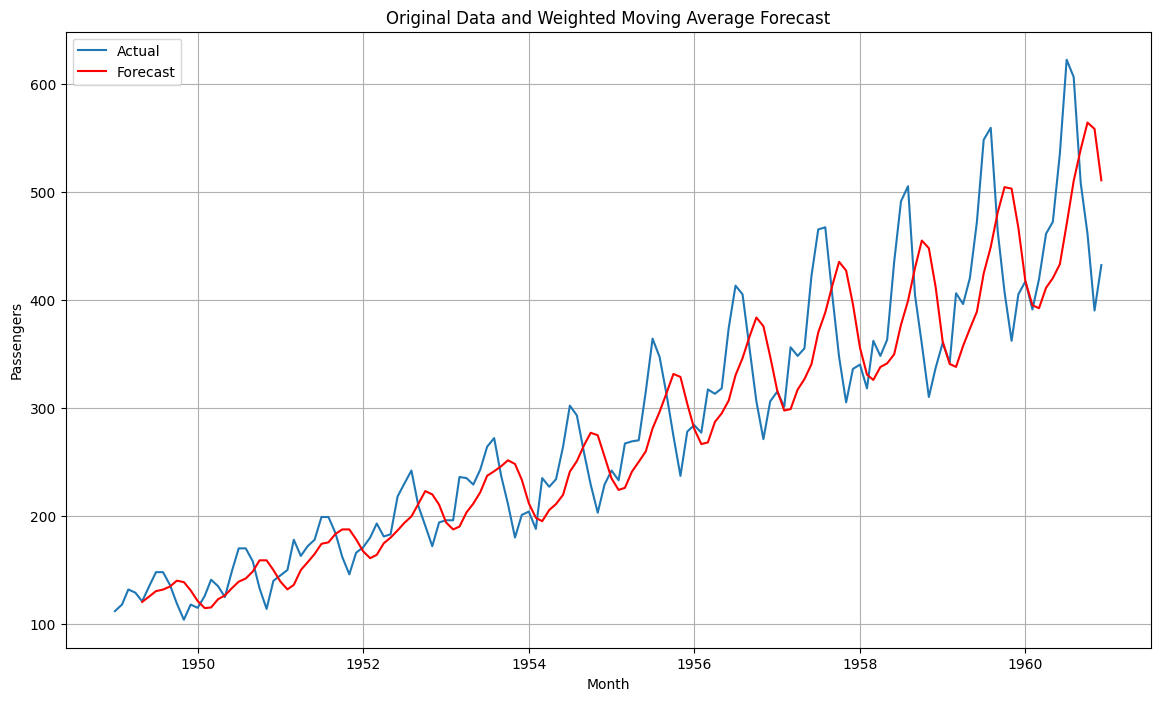

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(df.index, df['forecast'], label='Forecast', color='red')
plt.title('Original Data and Weighted Moving Average Forecast')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# **Exponential Smoothing**

In [ ]:
# Define exponential smoothing function
def exponential_smoothing(series, alpha):
    n = len(series)
    result = [np.nan] * n  # Initialize result list with NaNs
    result[0] = series[0]  # First value is same as series (no forecasting for first point)

    for t in range(1, n):
        result[t] = alpha * series[t] + (1 - alpha) * result[t-1]

    return result


In [ ]:
# Set the smoothing factor alpha
alpha = 0.3  # Can be tuned based on the specific dataset

In [ ]:
# Apply exponential smoothing
df['forecast'] = exponential_smoothing(df['Passengers'].values, alpha)

# Compute forecast error
df['forecast_error'] = df['Passengers'] - df['forecast']

# Compute absolute error
df['absolute_error'] = np.abs(df['forecast_error'])

# Compute squared error
df['squared_error'] = df['forecast_error'] ** 2

# Calculate Mean Absolute Error (MAE)
mae = np.nanmean(df['absolute_error'])  # Exclude NaN values

# Calculate Mean Squared Error (MSE)
mse = np.nanmean(df['squared_error'])  # Exclude NaN values

# Print error metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Absolute Error (MAE): 23.4882491406368
Mean Squared Error (MSE): 1024.239326263


In [ ]:
#Calculate Mean Absolute Percentage Error (MAPE)
df['percentage_error'] = (df['forecast_error'] / df['Passengers']) * 100
df['absolute_percentage_error'] = np.abs(df['percentage_error'])
mape = np.nanmean(df['absolute_percentage_error'])  # Exclude NaN values
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Percentage Error (MAPE): 7.870966971303555%


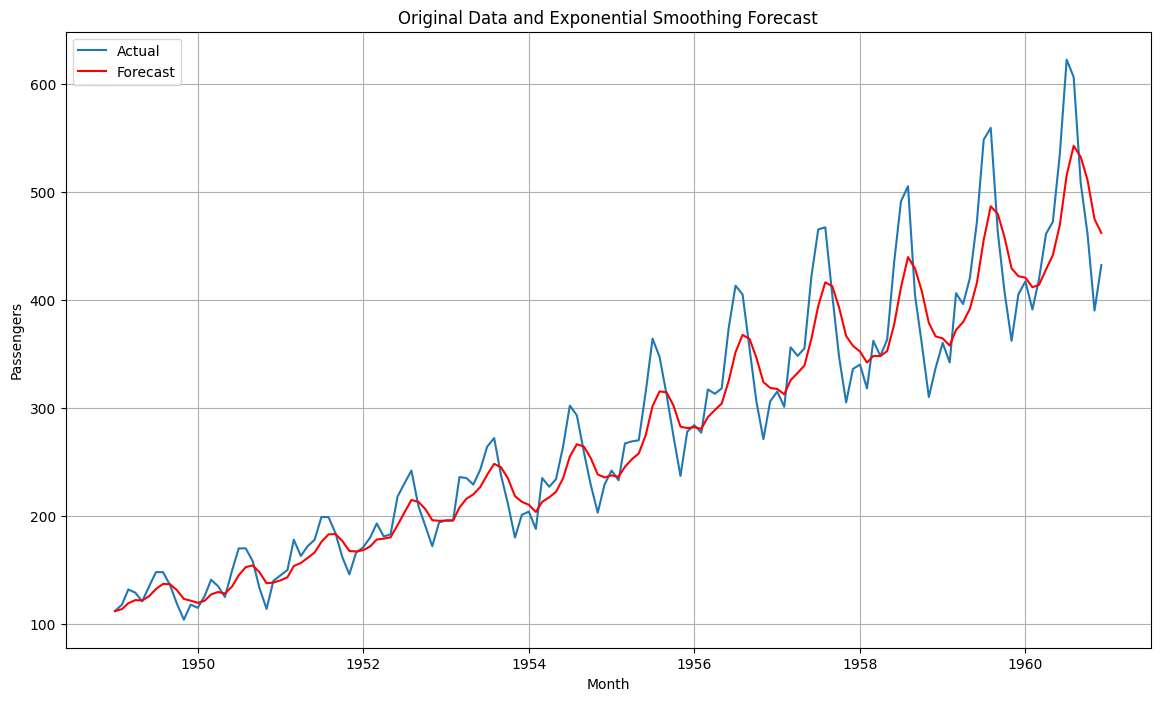

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(df.index, df['forecast'], label='Forecast', color='red')
plt.title('Original Data and Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Prepare data for regression
df['time'] = np.arange(len(df))  # Create a time index

# Fit linear regression model
X = df[['time']]
y = df['Passengers']

In [ ]:
model = LinearRegression().fit(X, y)


In [ ]:
# Predict trend values
df['trend'] = model.predict(X)

# Optional: Predict future values
future_steps = 12  # Number of future months to forecast
future_X = np.arange(len(df), len(df) + future_steps).reshape(-1, 1)
future_forecast = model.predict(future_X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


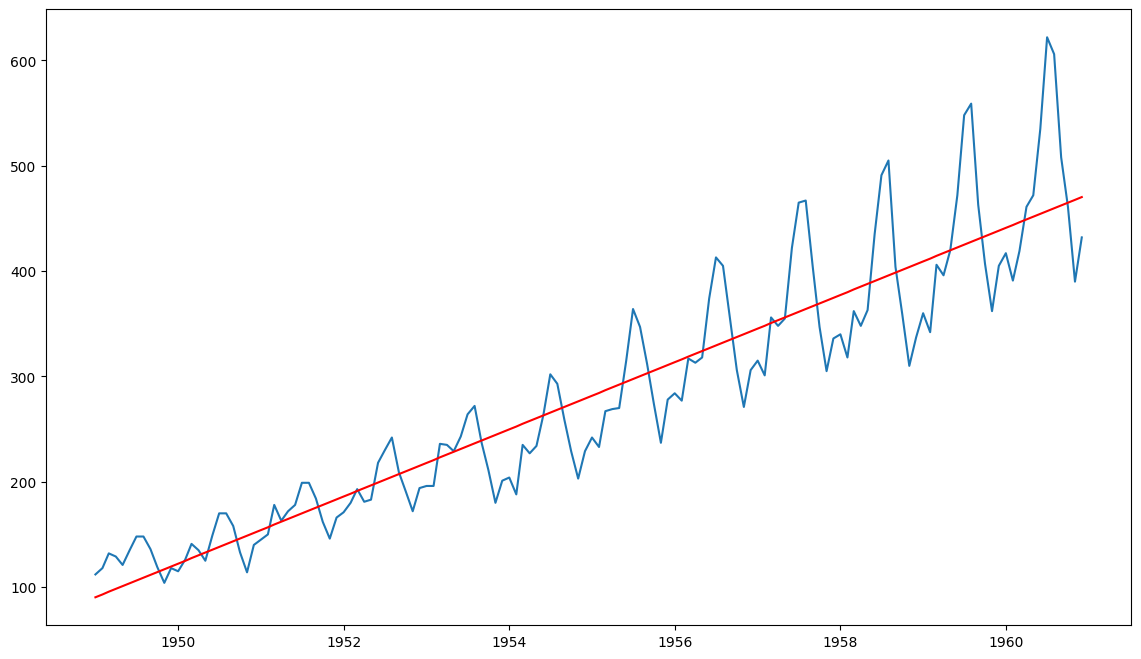

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(df.index, df['trend'], label='Trend (Linear Regression)', color='red')

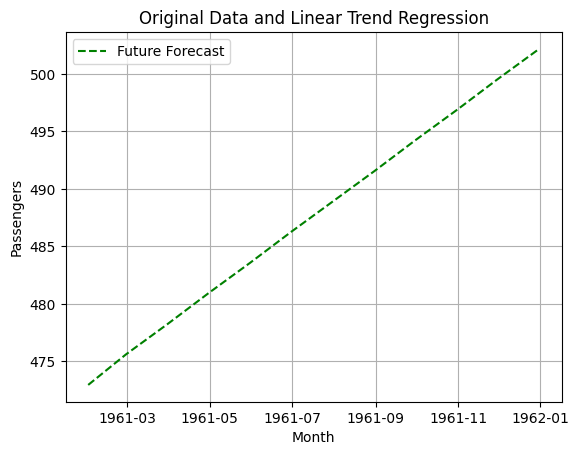

In [ ]:
# Plot future forecast
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='green', linestyle='--')

plt.title('Original Data and Linear Trend Regression')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# **Linear Regression line using the least squares method**

In [ ]:
# Calculate means
mean_time = np.mean(df['time'])
mean_passengers = np.mean(df['Passengers'])

# Calculate covariance and variance
covariance = np.sum((df['time'] - mean_time) * (df['Passengers'] - mean_passengers))
variance = np.sum((df['time'] - mean_time)**2)

# Calculate coefficients
beta = covariance / variance
alpha = mean_passengers - beta * mean_time

# Predict trend values
df['trend'] = alpha + beta * df['time']

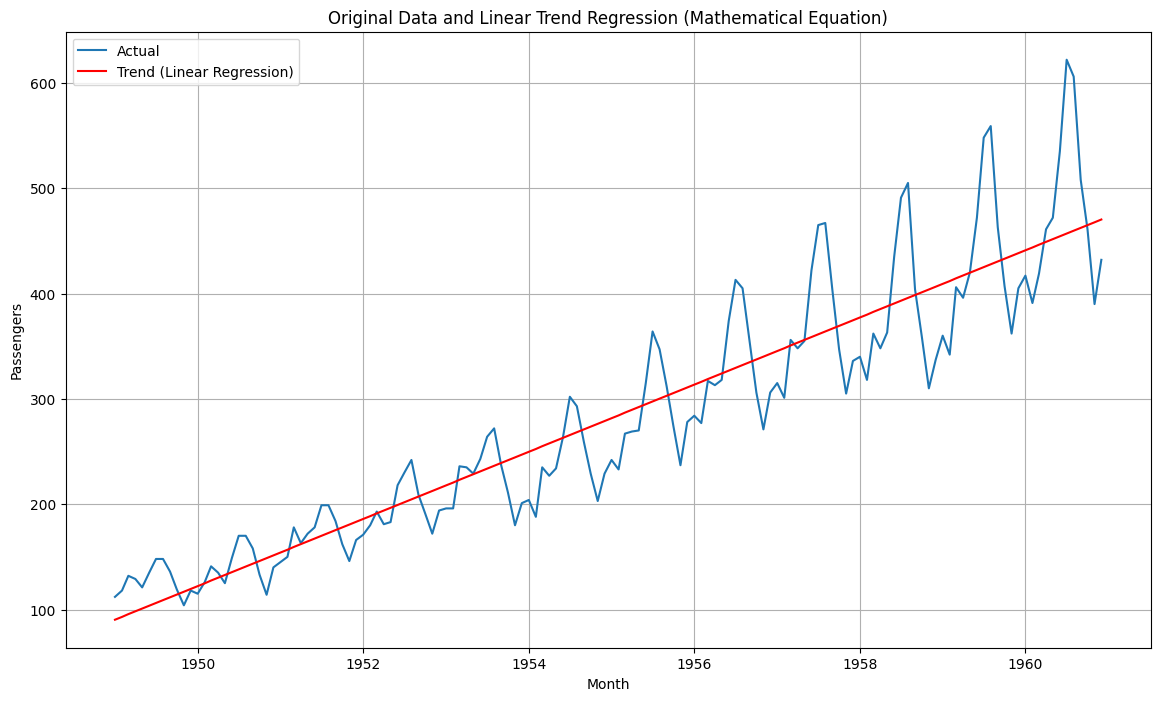

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(df.index, df['trend'], label='Trend (Linear Regression)', color='red')

plt.title('Original Data and Linear Trend Regression (Mathematical Equation)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Output the coefficients
print(f"Intercept (alpha): {alpha}")
print(f"Slope (beta): {beta}")

# Print the first few rows to verify
print(df.head())

Intercept (alpha): 90.30996168582374
Slope (beta): 2.657183908045977
            Passengers  SMA  CMA  forecast  forecast_error  absolute_error  \
Month                                                                        
1949-01-01         112  NaN  NaN  112.0000          0.0000          0.0000   
1949-02-01         118  NaN  NaN  113.8000          4.2000          4.2000   
1949-03-01         132  NaN  NaN  119.2600         12.7400         12.7400   
1949-04-01         129  NaN  NaN  122.1820          6.8180          6.8180   
1949-05-01         121  NaN  NaN  121.8274         -0.8274          0.8274   

            squared_error  percentage_error  absolute_percentage_error  time  \
Month                                                                          
1949-01-01       0.000000          0.000000                   0.000000     0   
1949-02-01      17.640000          3.559322                   3.559322     1   
1949-03-01     162.307600          9.651515                   9.

# **Non Linear**

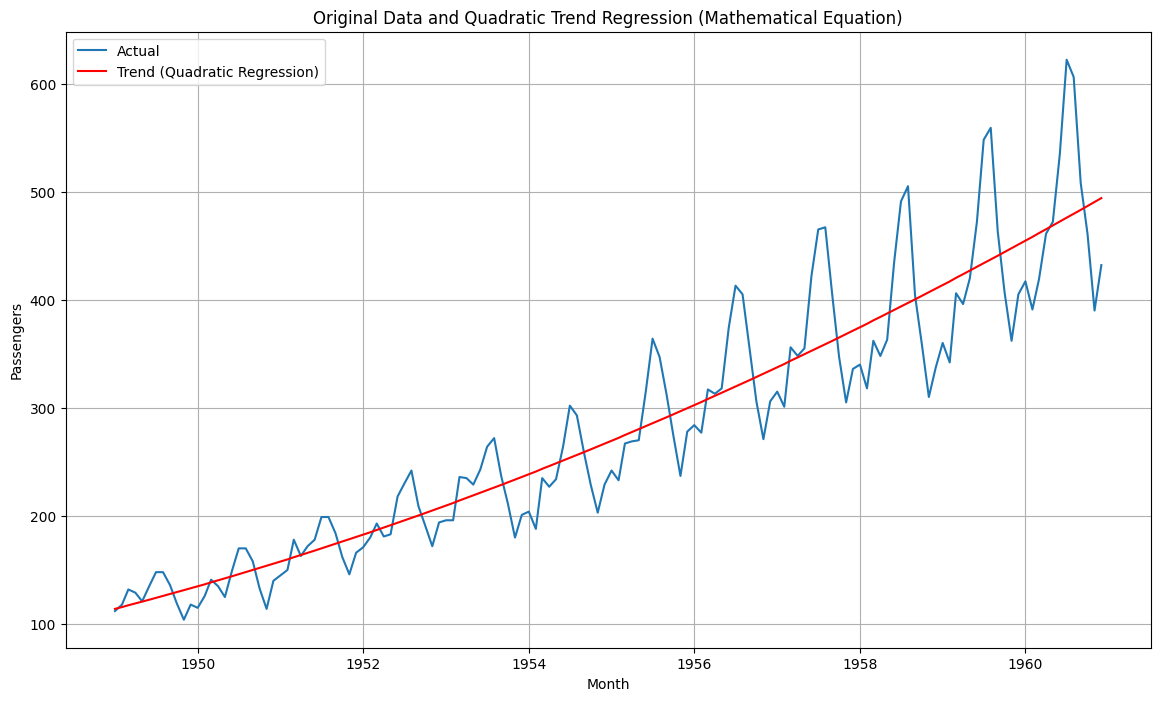

In [ ]:
# Prepare data for regression
df['time'] = np.arange(len(df))  # Create a time index starting from 0

# Formulate the design matrix X and target vector y
X = np.column_stack((np.ones(len(df)), df['time'], df['time']**2))
y = df['Passengers'].values

# Compute the coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict trend values
df['trend'] = coefficients[0] + coefficients[1] * df['time'] + coefficients[2] * df['time']**2

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(df.index, df['trend'], label='Trend (Quadratic Regression)', color='red')

plt.title('Original Data and Quadratic Trend Regression (Mathematical Equation)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# **Nonlinear Trend Regression Using Inbuilt Function**

In [ ]:
from numpy.polynomial.polynomial import Polynomial

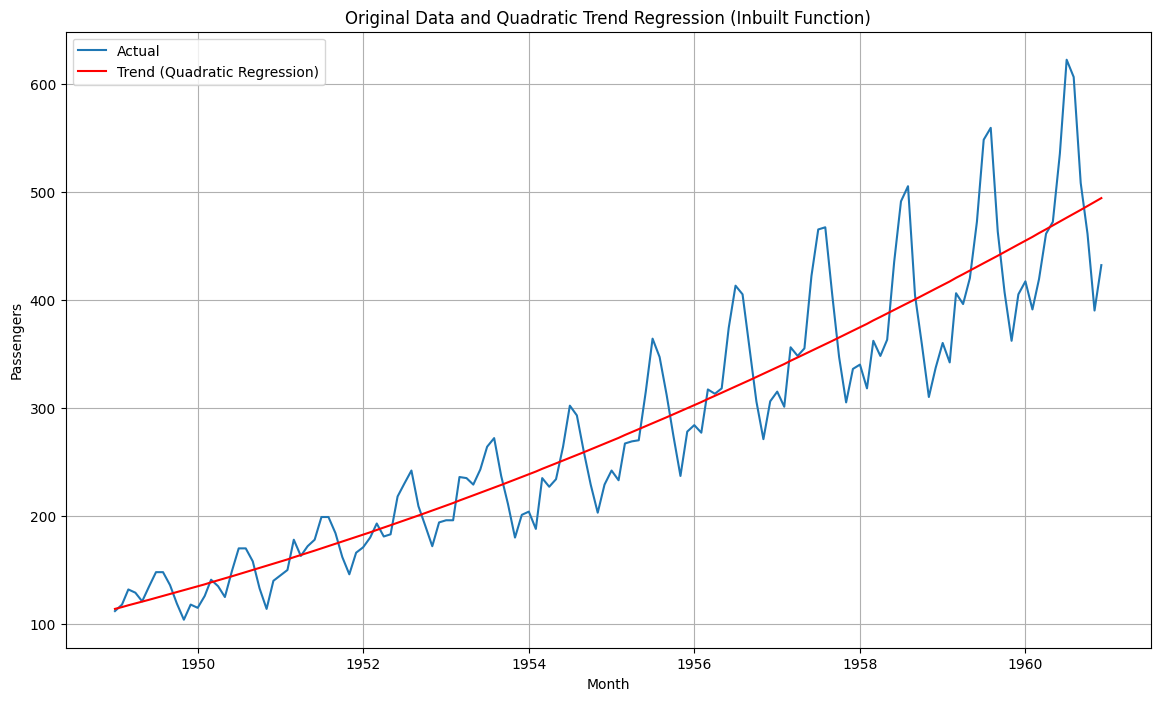

In [ ]:
# Prepare data for regression
df['time'] = np.arange(len(df))  # Create a time index starting from 0

# Fit a quadratic model
p = Polynomial.fit(df['time'], df['Passengers'], 2)

# Predict trend values
df['trend'] = p(df['time'])

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Passengers'], label='Actual')
plt.plot(df.index, df['trend'], label='Trend (Quadratic Regression)', color='red')

plt.title('Original Data and Quadratic Trend Regression (Inbuilt Function)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Output the coefficients
print(f"Coefficients: {p.convert().coef}")

# Print the first few rows to verify
print(df.head())

Coefficients: [1.14028041e+02 1.65501155e+00 7.00819832e-03]
            Passengers  SMA  CMA  forecast  forecast_error  absolute_error  \
Month                                                                        
1949-01-01         112  NaN  NaN  112.0000          0.0000          0.0000   
1949-02-01         118  NaN  NaN  113.8000          4.2000          4.2000   
1949-03-01         132  NaN  NaN  119.2600         12.7400         12.7400   
1949-04-01         129  NaN  NaN  122.1820          6.8180          6.8180   
1949-05-01         121  NaN  NaN  121.8274         -0.8274          0.8274   

            squared_error  percentage_error  absolute_percentage_error  time  \
Month                                                                          
1949-01-01       0.000000          0.000000                   0.000000     0   
1949-02-01      17.640000          3.559322                   3.559322     1   
1949-03-01     162.307600          9.651515                   9.651515  

# **Seasonality Without Trend**

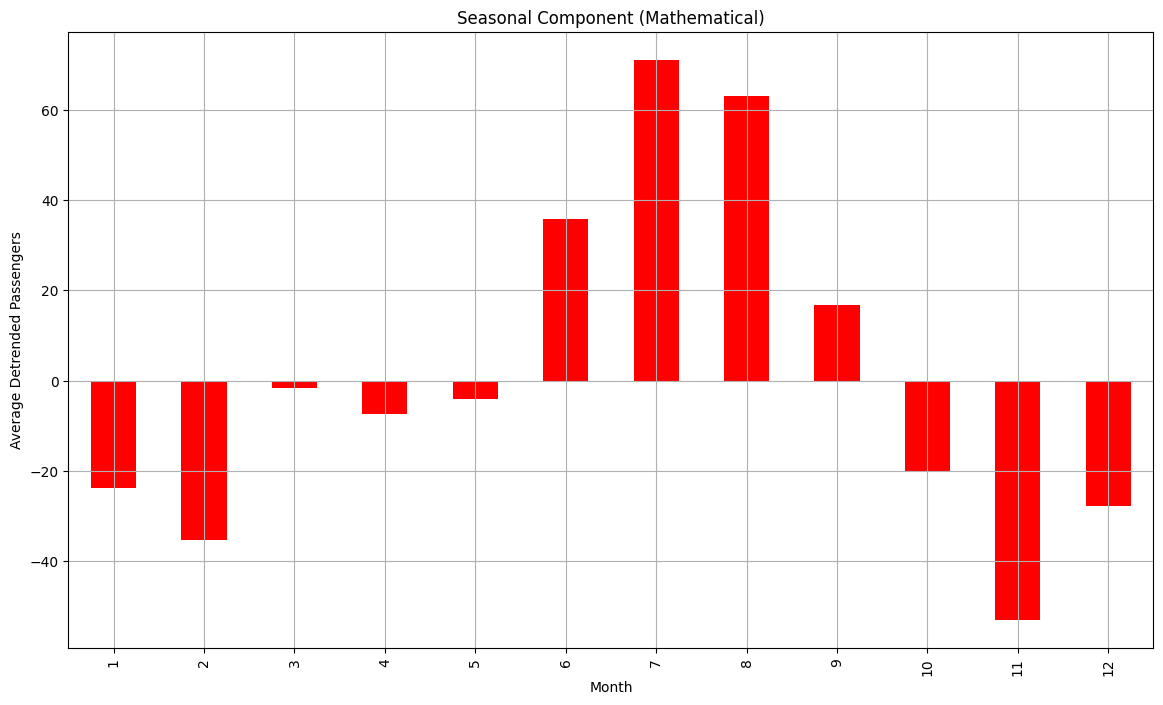

Seasonal Component:
month
1    -23.704545
2    -35.204545
3     -1.583333
4     -7.492424
5     -4.174242
6     35.840909
7     71.034722
8     63.106061
9     16.856061
10   -20.136364
11   -53.015152
12   -27.856061
Name: detrended, dtype: float64


In [ ]:
# 1. Calculate the 12-month centered moving average for the trend component
df['trend'] = df['Passengers'].rolling(window=12, center=True).mean()

# 2. Detrend the series (remove the trend)
df['detrended'] = df['Passengers'] - df['trend']

# 3. Calculate the seasonal component (average the detrended values for each month)
df['month'] = df.index.month
seasonal_component = df.groupby('month')['detrended'].mean()

# 4. Deseasonalize the series (remove the seasonal component)
df['seasonal_adjusted'] = df['Passengers'] - df['month'].map(seasonal_component)

# Plotting the seasonal component
plt.figure(figsize=(14, 8))
seasonal_component.plot(kind='bar', color='red')
plt.title('Seasonal Component (Mathematical)')
plt.xlabel('Month')
plt.ylabel('Average Detrended Passengers')
plt.grid(True)
plt.show()

# Print the seasonal component values
print("Seasonal Component:")
print(seasonal_component)

# **Seasonality Without Trend**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

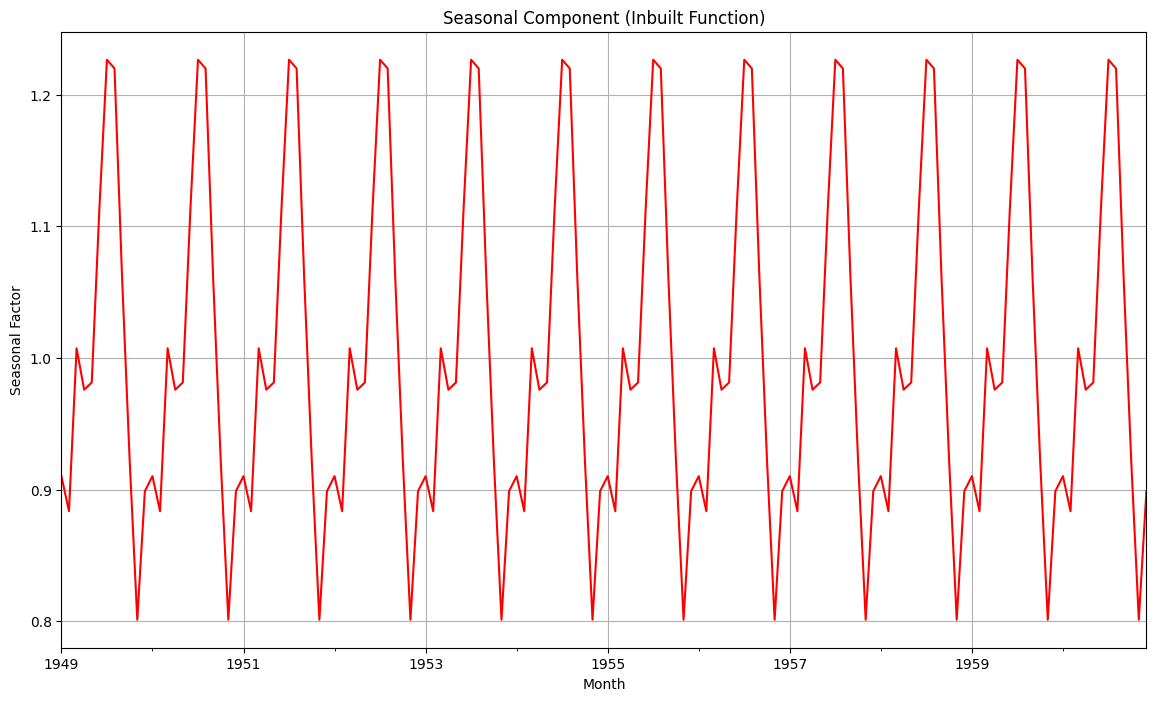

Seasonal Component:
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Name: seasonal, dtype: float64


In [ ]:
# 1. Perform seasonal decomposition
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# 2. Extract and plot the seasonal component
seasonal = decomposition.seasonal

plt.figure(figsize=(14, 8))
seasonal.plot(color='red')
plt.title('Seasonal Component (Inbuilt Function)')
plt.xlabel('Month')
plt.ylabel('Seasonal Factor')
plt.grid(True)
plt.show()

# Print the first few values of the seasonal component
print("Seasonal Component:")
print(seasonal.head(12))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          16 non-null     int64  
 1   Quarter       16 non-null     int64  
 2   Sales(1000s)  16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


In [ ]:
# Calculate the average sales for each quarter
quarterly_averages = df.groupby('Quarter')['Sales(1000s)'].mean()

# Calculate the overall average sales
overall_average = df['Sales(1000s)'].mean()

# Calculate the seasonal index for each quarter
seasonal_indexes = quarterly_averages / overall_average

In [ ]:
# Print the seasonal indexes
print("Seasonal Indexes:")
print(seasonal_indexes)

Seasonal Indexes:
Quarter
1    0.897160
2    0.814887
3    1.108717
4    1.179236
Name: Sales(1000s), dtype: float64


# **Quarterly Moving Average**

In [ ]:
# Calculate the 4-quarter moving average
df['4-Quarter Moving Average'] = df['Sales(1000s)'].rolling(window=4).mean()

# Print the DataFrame
print("Quarterly Moving Average:")
print(df)

Quarterly Moving Average:
    Year  Quarter  Sales(1000s)  4-Quarter Moving Average
0      1        1           4.8                       NaN
1      1        2           4.1                       NaN
2      1        3           6.0                       NaN
3      1        4           6.5                     5.350
4      2        1           5.8                     5.600
5      2        2           5.2                     5.875
6      2        3           6.8                     6.075
7      2        4           7.4                     6.300
8      3        1           6.0                     6.350
9      3        2           5.6                     6.450
10     3        3           7.5                     6.625
11     3        4           7.8                     6.725
12     4        1           6.3                     6.800
13     4        2           5.9                     6.875
14     4        3           8.0                     7.000
15     4        4           8.4               

# **Weighted Quarterly Moving Average**

In [ ]:
# Define the weights
weights = np.array([0.1, 0.2, 0.3, 0.4])

In [ ]:
# Calculate the weighted moving average
def weighted_moving_average(values, weights):
    return np.sum(values * weights)

# Initialize the column for weighted moving average
df['Weighted 4-Quarter Moving Average'] = np.nan

In [ ]:
# Calculate the weighted moving average for each point in the series
for i in range(3, len(df)):
    df.loc[i, 'Weighted 4-Quarter Moving Average'] = weighted_moving_average(df['Sales(1000s)'].iloc[i-3:i+1].values, weights)

# Print the DataFrame
print("\nWeighted Quarterly Moving Average:")
print(df)


Weighted Quarterly Moving Average:
    Year  Quarter  Sales(1000s)  4-Quarter Moving Average  \
0      1        1           4.8                       NaN   
1      1        2           4.1                       NaN   
2      1        3           6.0                       NaN   
3      1        4           6.5                     5.350   
4      2        1           5.8                     5.600   
5      2        2           5.2                     5.875   
6      2        3           6.8                     6.075   
7      2        4           7.4                     6.300   
8      3        1           6.0                     6.350   
9      3        2           5.6                     6.450   
10     3        3           7.5                     6.625   
11     3        4           7.8                     6.725   
12     4        1           6.3                     6.800   
13     4        2           5.9                     6.875   
14     4        3           8.0                  

In [ ]:
df['Year/Quarter'] = df.apply(lambda row: f'{row.Year}/Q{row.Quarter}', axis=1)

# Set 'Year/Quarter' as index
df.set_index('Year/Quarter', inplace=True)

In [ ]:
# Calculate the 4-quarter centered moving average
df['Centered Moving Average'] = df['Sales(1000s)'].rolling(window=4, center=True).mean()

# Ensure moving averages are centered correctly
df['Centered Moving Average'] = df['Centered Moving Average'].shift(-1)


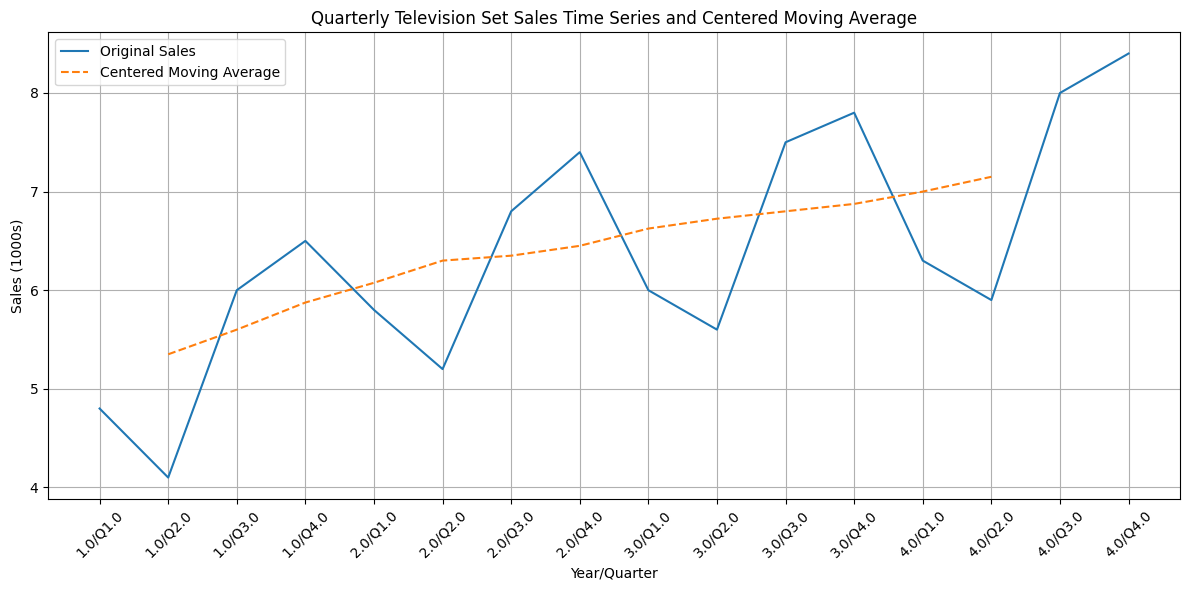

In [ ]:
# Plotting the original time series and centered moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales(1000s)'], label='Original Sales')
plt.plot(df.index, df['Centered Moving Average'], label='Centered Moving Average', linestyle='--')
plt.title('Quarterly Television Set Sales Time Series and Centered Moving Average')
plt.xlabel('Year/Quarter')
plt.ylabel('Sales (1000s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **seasonal irregular values**

In [ ]:
# Calculate the 4-quarter centered moving average
df['CMA'] = df['Sales(1000s)'].rolling(window=4, center=True).mean()


In [ ]:
# Calculate ratio-to-moving-average
df['Ratio-to-MA'] = df['Sales(1000s)'] / df['CMA']


In [ ]:
# Calculate average ratio-to-moving-average for each quarter
seasonal_indices = df.groupby('Quarter')['Ratio-to-MA'].mean()
seasonal_indices
# Calculate average ratio-to-moving-average for each quarter
seasonal_indices = df.groupby('Quarter')['Ratio-to-MA'].mean()
seasonal_indices


Quarter
1    0.944610
2    0.848036
3    1.108746
4    1.157709
Name: Ratio-to-MA, dtype: float64

In [ ]:
# Assign seasonal indices to each quarter
df['Seasonal Index'] = df['Quarter'].apply(lambda x: seasonal_indices[x])

# Calculate seasonal irregular values
df['Seasonal Irregular'] = df['Sales(1000s)'] / df['Seasonal Index']


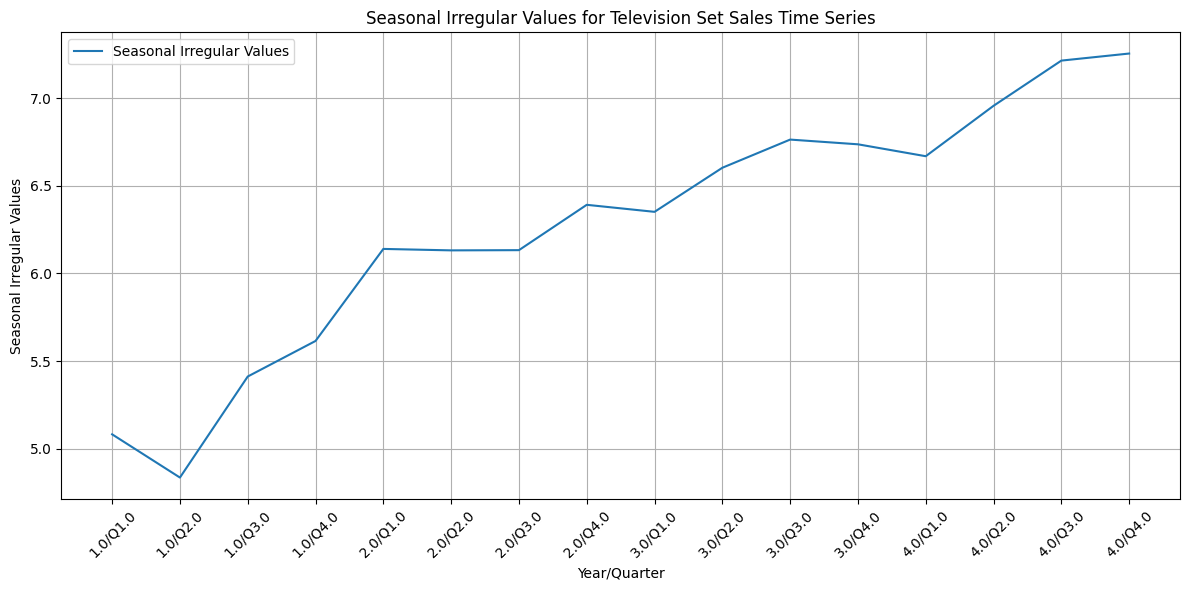

In [ ]:
import matplotlib.pyplot as plt

# Plotting the seasonal irregular values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Seasonal Irregular'], label='Seasonal Irregular Values')
plt.title('Seasonal Irregular Values for Television Set Sales Time Series')
plt.xlabel('Year/Quarter')
plt.ylabel('Seasonal Irregular Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Extract required columns
result = df[['Quarter', 'Seasonal Index', 'Seasonal Irregular']]

# Print the result
print(result)

              Quarter  Seasonal Index  Seasonal Irregular
Year/Quarter                                             
1.0/Q1.0            1        0.944610            5.081462
1.0/Q2.0            2        0.848036            4.834702
1.0/Q3.0            3        1.108746            5.411520
1.0/Q4.0            4        1.157709            5.614536
2.0/Q1.0            1        0.944610            6.140100
2.0/Q2.0            2        0.848036            6.131817
2.0/Q3.0            3        1.108746            6.133056
2.0/Q4.0            4        1.157709            6.391934
3.0/Q1.0            1        0.944610            6.351827
3.0/Q2.0            2        0.848036            6.603495
3.0/Q3.0            3        1.108746            6.764400
3.0/Q4.0            4        1.157709            6.737444
4.0/Q1.0            1        0.944610            6.669419
4.0/Q2.0            2        0.848036            6.957254
4.0/Q3.0            3        1.108746            7.215360
4.0/Q4.0      

In [ ]:
# Calculate deseasonalized values
df['Deseasonalized'] = df['Sales(1000s)'] / df['Seasonal Index']

# Print the deseasonalized values
print(df[['Quarter', 'Sales(1000s)', 'Seasonal Index', 'Deseasonalized']])

              Quarter  Sales(1000s)  Seasonal Index  Deseasonalized
Year/Quarter                                                       
1.0/Q1.0            1           4.8        0.944610        5.081462
1.0/Q2.0            2           4.1        0.848036        4.834702
1.0/Q3.0            3           6.0        1.108746        5.411520
1.0/Q4.0            4           6.5        1.157709        5.614536
2.0/Q1.0            1           5.8        0.944610        6.140100
2.0/Q2.0            2           5.2        0.848036        6.131817
2.0/Q3.0            3           6.8        1.108746        6.133056
2.0/Q4.0            4           7.4        1.157709        6.391934
3.0/Q1.0            1           6.0        0.944610        6.351827
3.0/Q2.0            2           5.6        0.848036        6.603495
3.0/Q3.0            3           7.5        1.108746        6.764400
3.0/Q4.0            4           7.8        1.157709        6.737444
4.0/Q1.0            1           6.3        0.944

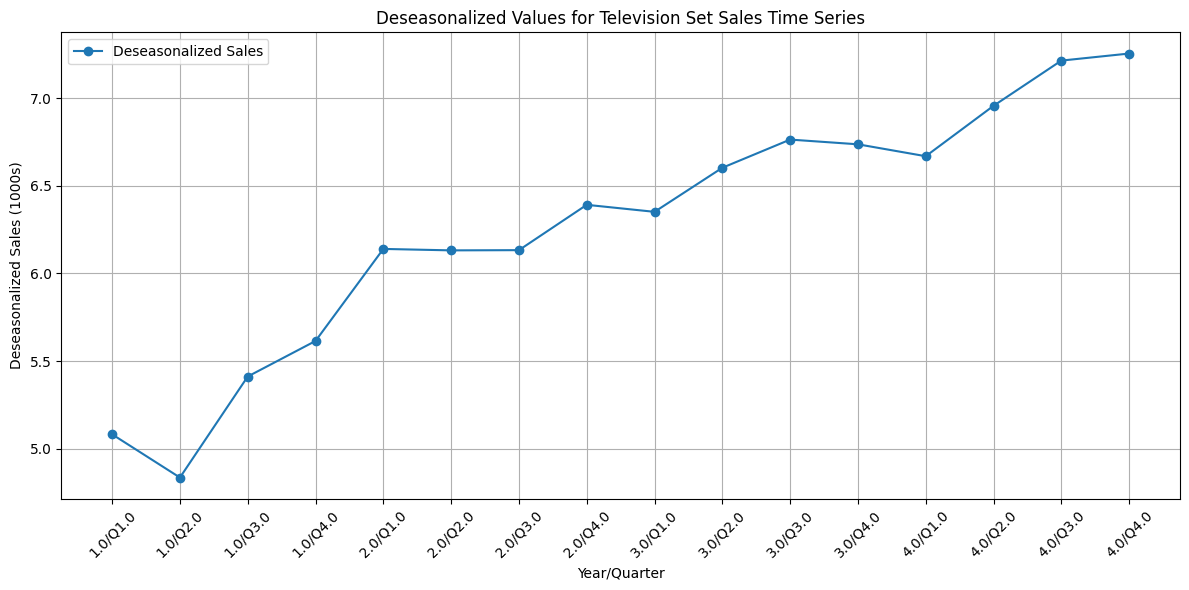

In [ ]:
# Plot the deseasonalized values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Deseasonalized'], marker='o', linestyle='-', label='Deseasonalized Sales')
plt.title('Deseasonalized Values for Television Set Sales Time Series')
plt.xlabel('Year/Quarter')
plt.ylabel('Deseasonalized Sales (1000s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
x = np.arange(len(df))  # Use indices as x values (assuming evenly spaced)
y = df['Deseasonalized'].values


In [ ]:
# Fit a linear regression (y = mx + c)
n = len(x)
slope = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
intercept = (np.sum(y) - slope * np.sum(x)) / n


In [ ]:
# Calculate predicted values using the regression equation
predicted = slope * x + intercept


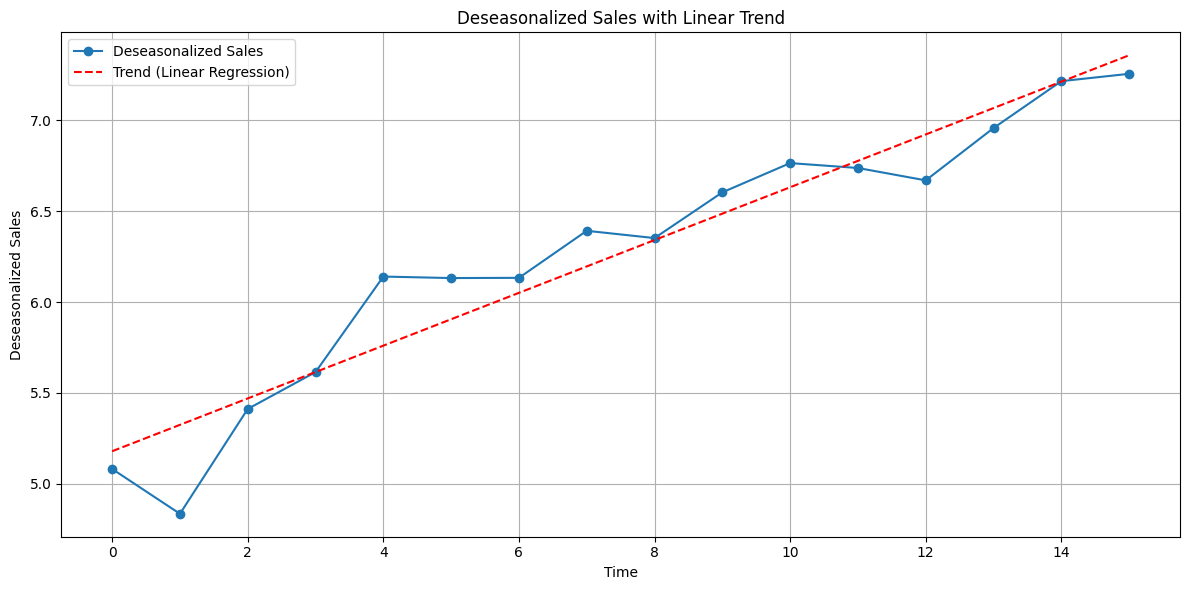

In [ ]:
# Plot the data and regression line
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Deseasonalized Sales')
plt.plot(x, predicted, linestyle='--', color='red', label='Trend (Linear Regression)')
plt.title('Deseasonalized Sales with Linear Trend')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Print the regression equation
print(f"Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

Regression Equation: y = 0.15x + 5.18


In [ ]:
# Calculate moving average (e.g., 4-quarter moving average)
df['4Q_MA'] = df['Sales(1000s)'].rolling(window=4).mean()

# Forecasting for the next quarter
last_year = df['Year'].max()
last_quarter = df[df['Year'] == last_year]['Quarter'].max()

next_quarter = 1 if last_quarter == 4 else last_quarter + 1
next_year = last_year if next_quarter > 1 else last_year + 1

# Forecasted value for the next quarter using the last known moving average
forecast = df[df['Year'] == last_year]['4Q_MA'].iloc[-1]

# Print forecasted value
print(f"Forecast for Q{next_quarter}, {next_year}: {forecast}")